<a href="https://colab.research.google.com/github/bowserd1/California-Housing-Project/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
import matplotlib as plt
import seaborn as sns
import xgboost as xgb

In [5]:
X_train=pd.read_csv('/content/drive/MyDrive/Colab Data Sets/X_train.csv')
X_test=pd.read_csv('/content/drive/MyDrive/Colab Data Sets/X_test.csv')
y_train=pd.read_csv('/content/drive/MyDrive/Colab Data Sets/y_train.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Colab Data Sets/y_test.csv')

In [6]:
models = {"Linear Regression": LinearRegression(), "Ridge": linear_model.Ridge(alpha=0.1), "Lasso": linear_model.Lasso(alpha=0.1), "Random Forest": RandomForestRegressor(n_estimators=1000, random_state=47)}
results = []

In [7]:
for model in models.values():
  kf = KFold(n_splits=4, random_state=47, shuffle=True)
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
  results.append(cv_scores)


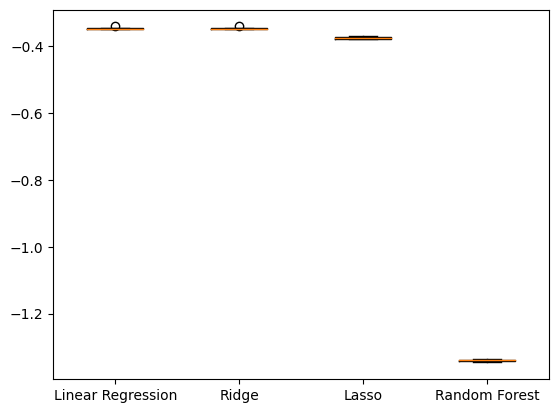

In [8]:
plt.pyplot.boxplot(results, labels=models.keys());

The first models that I created are a Linear Regression, a Ridge Regression and a Lasso Regression. We can see here that the Linear and Ridge regressions are essentially identical, while the Lasso regression's scores are lagging significantly. These models are being evaluated by the negative mean root error, so the closer to 0, the better.

In [9]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [10]:
params = {"objective": "reg:squarederror"}
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

In [11]:
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=1000,
   evals=evals,
   verbose_eval=50
)

[0]	train-rmse:10614.87844	validation-rmse:10626.17241
[50]	train-rmse:21.08469	validation-rmse:21.97239
[100]	train-rmse:15.04657	validation-rmse:16.91563
[150]	train-rmse:11.22013	validation-rmse:13.55948
[200]	train-rmse:8.70038	validation-rmse:11.34323
[250]	train-rmse:6.82681	validation-rmse:9.95448
[300]	train-rmse:5.83806	validation-rmse:9.30787
[350]	train-rmse:4.85473	validation-rmse:8.59749
[400]	train-rmse:4.24561	validation-rmse:8.30000
[450]	train-rmse:3.72916	validation-rmse:7.99096
[500]	train-rmse:3.35017	validation-rmse:7.86305
[550]	train-rmse:3.00604	validation-rmse:7.73416
[600]	train-rmse:2.73790	validation-rmse:7.63254
[650]	train-rmse:2.51012	validation-rmse:7.58001
[700]	train-rmse:2.30460	validation-rmse:7.51535
[750]	train-rmse:2.10353	validation-rmse:7.45865
[800]	train-rmse:1.90871	validation-rmse:7.39708
[850]	train-rmse:1.76596	validation-rmse:7.35750
[900]	train-rmse:1.62850	validation-rmse:7.32889
[950]	train-rmse:1.49120	validation-rmse:7.31178
[999]	tr

In [12]:
results = xgb.cv(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=450,
   verbose_eval=50, nfold=5
);

[0]	train-rmse:10615.70309+15.29007	test-rmse:10615.56670+60.48763
[50]	train-rmse:22.20842+0.68224	test-rmse:23.25234+1.11842
[100]	train-rmse:14.90348+0.46625	test-rmse:16.82682+0.49442
[150]	train-rmse:10.68923+0.24686	test-rmse:13.37102+0.36579
[200]	train-rmse:8.17058+0.20202	test-rmse:11.38563+0.39451
[250]	train-rmse:6.73624+0.14655	test-rmse:10.50319+0.35494
[300]	train-rmse:5.65088+0.11136	test-rmse:9.85594+0.27579
[350]	train-rmse:4.82988+0.10980	test-rmse:9.43653+0.34210
[400]	train-rmse:4.18850+0.07773	test-rmse:9.14904+0.32591
[449]	train-rmse:3.70438+0.06662	test-rmse:8.97023+0.29939


In [13]:
results.head(-5)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10615.703095,15.290069,10615.566701,60.487627
1,7435.787353,10.697703,7435.509497,41.840774
2,5208.194880,7.486625,5207.906586,29.225054
3,3648.242671,5.244771,3647.991759,20.783769
4,2555.824645,3.668222,2555.552779,14.556768
...,...,...,...,...
440,3.780783,0.066824,8.991382,0.304769
441,3.773419,0.066387,8.989606,0.301834
442,3.766841,0.067689,8.987956,0.302413
443,3.763809,0.068843,8.987836,0.301652


In [14]:
lin_reg = LinearRegression()

In [19]:
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)

In [33]:
y_pred_df = pd.DataFrame(y_pred,columns = ["ID","MedHouseVal"])

In [36]:
y_pred_df.head()

,ID,MedHouseVal
0,12755.0,2.567526
1,26184.0,3.507294
2,16652.0,2.344051
3,19112.0,1.077380
4,29673.0,0.325669


In [28]:
y_test

,Unnamed: 0,MedHouseVal
0,12755,2.538
1,26184,4.318
2,16652,1.655
3,19112,1.046
4,29673,0.875
...,...,...
9280,12167,0.889
9281,23383,2.285
9282,27049,1.811
9283,6395,2.487
